In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import popoff
import loadpaths
from linear_model import PoolAcrossSessions, MultiSessionModel

from Session import SessionLite

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

/home/jrowland/Documents/code/pop-off/popoff/popoff/loadpaths.py


In [3]:
params = {'legend.fontsize': 'xx-large',
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}

plt.rc("axes.spines", top=False, right=False) # despine

plt.rcParams.update(params)

COLORS = [
'#228E5E', # Hit green
'#DB3713', # Miss red
]

In [4]:
# Do you want to remove all cells that were ever targetted from all future analysis?
remove_targets = True
# Do you want to just analyse the three 'training set' sessions ([0,3,7]) indexes hardcoded
# as keep_sessions variable in PoolAcrossSessions
subsample_sessions = True
# Set hits with first lick < 250ms as toosoon?
remove_toosoon = True
# Build the MultiSessionModel object
msm = MultiSessionModel(remove_targets=remove_targets, subsample_sessions=subsample_sessions,
                         remove_toosoon = remove_toosoon)
msm.sessions

{3: instance Mouse J064, run 10 of Session class,
 7: instance Mouse RL070, run 29 of Session class,
 0: instance Mouse J065, run 10 of Session class}

Text(0, 0.5, 'Balanced Accuracy Score')

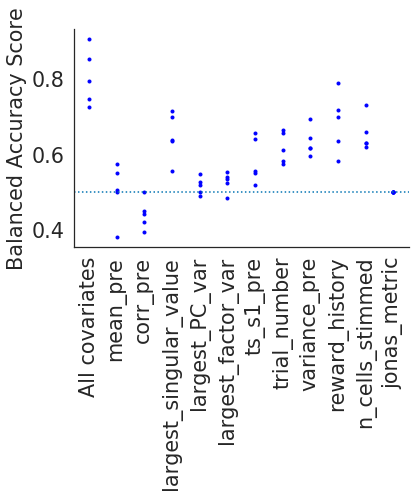

In [5]:
msm.single_covariate(region='s1')
plt.ylabel('Balanced Accuracy Score')

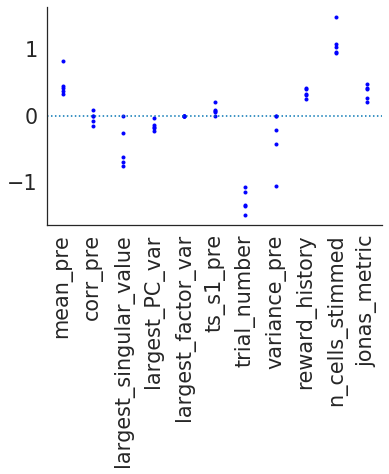

In [6]:
msm.plot_betas(region='s1')

dict_keys(['trial_number', 'variance_pre', 'reward_history', 'n_cells_stimmed'])
dict_keys(['ts_s1_pre', 'variance_pre', 'reward_history', 'n_cells_stimmed'])
dict_keys(['ts_s1_pre', 'trial_number', 'reward_history', 'n_cells_stimmed'])
dict_keys(['ts_s1_pre', 'trial_number', 'variance_pre', 'n_cells_stimmed'])
dict_keys(['ts_s1_pre', 'trial_number', 'variance_pre', 'reward_history'])


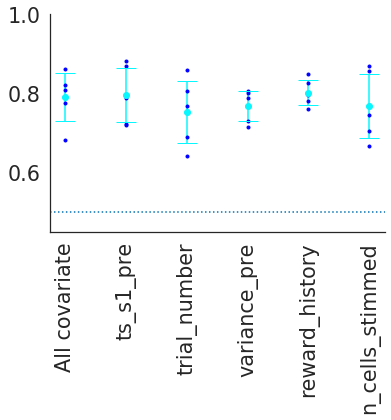

In [16]:
msm.dropout(region='s1')

In [11]:
# Correlate variables to see what largest sv actually does
X, y = msm.across_session_covariates()

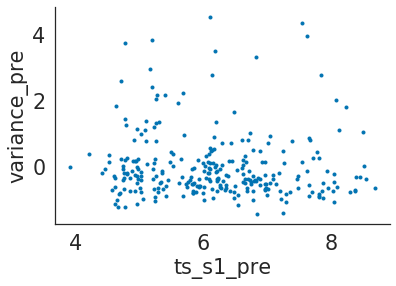

In [12]:
cov_a = 'ts_s1_pre'
cov_b = 'variance_pre'
plt.plot(X[cov_a], X[cov_b], ".")
plt.xlabel(cov_a)
plt.ylabel(cov_b)
slope, intercept, r_value, p_value, std_err = stats.linregress(X[cov_a], X[cov_b])

In [11]:
num_neurons = 120
len_time = 1341
A = np.random.normal(size=(len_time, num_neurons)) * 0.1 + 10
A += np.random.normal(size=(len_time, 1)) * 20 + 20
A -= np.mean(A)
# Largest singular value divided by the square root of the size of the matrix
print(np.linalg.svd(A)[1][0] / np.sqrt(num_neurons * len_time))
# Is equal to the standard deviation of the mean
print(np.std(np.mean(A, axis=1)))

19.747603930696382
19.747603769564716


In [12]:
np.var(A)

389.97771382997803